<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/Air_Quality_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Quality Forecasting


###**Objective:**

The objective of this project assignment is to develop a
machine learning model that predicts future air quality levels based
on historical air quality data and relevant environmental factors.

The dataset consists of hourly atmospheric measurements from 12
cities in Beijing, covering the period from **March 1st, 2013**, to
**February 28th, 2017**.

The target variables are PM2.5, PM10, SO2,
NO2, CO, and O3, along with independent variables like temperature,
pressure, dew point temperature, rainfall, wind speed, and wind
direction.

### Data Overview

**No (int64):** Row index or identifier, likely auto-generated.
Not essential for analysis unless it's specifically needed for referencing rows.

**year (int64):** The year the observation was recorded.

**month (int64):** The month the observation was recorded, represented as an integer (1 for January, 2 for February, etc.).

**day (int64):** The day of the month the observation was recorded.

**hour (int64):** The hour of the day the observation was recorded, in 24-hour format (0–23).

**PM2.5 (float64):** The concentration of fine particulate matter (particles smaller than 2.5 micrometers in diameter) in micrograms per cubic meter of air.
Important for assessing air quality and its impact on human health.

**PM10 (float64):** The concentration of particulate matter smaller than 10 micrometers.
Includes larger particles than PM2.5 and also contributes to air quality analysis.

**SO2 (float64):** The concentration of sulfur dioxide in the air, measured in micrograms per cubic meter.
SO2 is a harmful pollutant mainly produced by burning fossil fuels.

**NO2 (float64):** The concentration of nitrogen dioxide in the air, measured in micrograms per cubic meter.
NO2 is a significant pollutant from vehicle emissions and industrial activity.

**CO (float64):** The concentration of carbon monoxide in the air, measured in milligrams per cubic meter.
CO is a colorless, odorless gas resulting from incomplete combustion.

**O3 (float64):** The concentration of ozone in the air, measured in micrograms per cubic meter.
Ozone is a key component of smog and is harmful at ground level.

**TEMP (float64):** Ambient temperature, typically measured in degrees Celsius (°C).
Weather condition parameter influencing air quality.

**PRES (float64):** Atmospheric pressure, typically measured in hectopascals (hPa).
Useful for understanding weather conditions affecting air quality.

**DEWP (float64):** Dew point temperature, measured in degrees Celsius.
Indicates humidity levels, impacting the dispersion of air pollutants.

**RAIN (float64):** Amount of rainfall, measured in millimeters.
Rain can cleanse the air by washing out particulate matter.

**wd (object):** Wind direction, typically categorical (e.g., "N", "NE", "SW").
Determines how pollutants disperse in the atmosphere.

**WSPM (float64):** Wind speed, typically measured in meters per second (m/s).
Influences pollutant dispersion and air quality.

**station (object):** The monitoring station where the data was recorded.
Identifies the location of the measurements.

In [2]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=5cc6c59de78d271f7be9511607a5fb24d9e4c62b387e69105fe145f15ab73f4c
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [80]:
!pip install prophet

In [81]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet

In [34]:
import arff

# Open and load the .arff file
with open('/content/air_dataset.arff', 'r') as file:
    dataset = arff.load(file)

# Convert to a Pandas DataFrame
df = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Display the first few rows
print(df.head())


   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


## 1. Explore the Data

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [36]:
# drop irrelevant columns
df.drop(['No'], axis=1, inplace=True)

In [37]:
# check missing values
df.isnull().sum()

,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701
O3,13277


In [38]:
# percentage of missing values %
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64


## 2. Data Preprocessing

### 2.1 Date and Time Conversion

I combined the year, month, day, and hour columns into a single datetime column to structure the data chronologically. This step simplifies slicing, resampling, and analyzing patterns over time.

By setting datetime as the index, I can efficiently handle time-series operations and align the data for ARIMA modeling and other forecasting techniques that rely on temporal relationships.

In [39]:
# Combine year, month, day, and hour into datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)  # Ensure the data is sorted by datetime

### 2.2 Handle Missing Data

####  **Interpolation (Method='time')**

- **How it works**: Interpolation estimates missing values by considering the surrounding data points based on time, ensuring that time intervals are respected during imputation.
- **Why it's ideal for air quality forecasting**: Air quality data (e.g., PM2.5, NO2) follows continuous, smooth trends. Interpolation captures these trends and provides realistic estimates for missing values.
- **Why forward/backward fill is not ideal**: Forward or backward fill methods can introduce "flat-line" effects, distorting continuous data trends by filling missing values with the last or next known value without considering gradual changes over time.

####  **Imputation for Categorical Data (e.g., Wind Direction - `wd`)**

- **How it works**: Forward-fill (`ffill`) is used to fill missing values in categorical variables like wind direction, as these values often remain stable over short periods.
- **Why forward fill works well**: Wind direction typically doesn't change rapidly, and forward-fill ensures that missing values are imputed consistently and reasonably without introducing unnecessary variability.

### **Conclusion**

- **Continuous Data (e.g., air quality metrics)**: I used **Interpolation (Method='time')** to preserve temporal trends.
- **Categorical Data (e.g., wind direction)**: I used **Forward Fill (ffill)** for consistent imputation over short time intervals.

In [40]:
# Define the numerical columns for interpolation
numerical_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Interpolate missing numerical values
df[numerical_cols] = df[numerical_cols].interpolate(method='time')

# Forward-fill missing wind direction (categorical data)
df['wd'] = df['wd'].fillna(method='ffill')

<ipython-input-40-19356ac4e778>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='ffill')


### 2.3 Resampling the Data

Since the data is hourly, I will resample it to a daily frequency to simplify analysis and make forecasting more manageable. I'll take the mean of each feature per day.

In [41]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Resample the numeric columns to daily frequency
df_daily = df[numeric_columns].resample('D').mean()

# Check the result
print(df_daily.head())

              year  month  day  hour       PM2.5        PM10        SO2  \
datetime                                                                  
2013-03-01  2013.0    3.0  1.0  11.5    7.326389   12.256944   9.190972   
2013-03-02  2013.0    3.0  2.0  11.5   31.475694   40.524306  31.785656   
2013-03-03  2013.0    3.0  3.0  11.5   79.291667  111.104167  49.361111   
2013-03-04  2013.0    3.0  4.0  11.5   22.187500   40.447917  18.792650   
2013-03-05  2013.0    3.0  5.0  11.5  131.538194  159.236111  71.055556   

                   NO2           CO         O3      TEMP         PRES  \
datetime                                                                
2013-03-01   20.885417   402.430556  68.809028  1.173958  1026.569792   
2013-03-02   56.397513   947.527778  32.687918  0.260417  1026.552778   
2013-03-03   76.677083  1776.177083  22.788194  5.257292  1014.215278   
2013-03-04   42.576803   724.604167  56.833333  9.610764  1017.263194   
2013-03-05  103.947917  2035.479167 

## 3. Feature Engineering



### 3.1 Lagged Features (Temporal Lag)

I created lag features for PM2.5 pollutant PM2.5 over 1, 2, and 3-day lags. This captures the influence of past pollutant levels on current values. For example, the PM2.5 levels from the previous days may influence today's air quality.

In [42]:
# Create lag features (1-day lag)
df_daily['PM2.5_lag_1'] = df_daily['PM2.5'].shift(1)

# Create rolling averages (3-day rolling average)
df_daily['PM2.5_rolling_3'] = df_daily['PM2.5'].rolling(window=3).mean()

# Check the result
print(df_daily.head())

              year  month  day  hour       PM2.5        PM10        SO2  \
datetime                                                                  
2013-03-01  2013.0    3.0  1.0  11.5    7.326389   12.256944   9.190972   
2013-03-02  2013.0    3.0  2.0  11.5   31.475694   40.524306  31.785656   
2013-03-03  2013.0    3.0  3.0  11.5   79.291667  111.104167  49.361111   
2013-03-04  2013.0    3.0  4.0  11.5   22.187500   40.447917  18.792650   
2013-03-05  2013.0    3.0  5.0  11.5  131.538194  159.236111  71.055556   

                   NO2           CO         O3      TEMP         PRES  \
datetime                                                                
2013-03-01   20.885417   402.430556  68.809028  1.173958  1026.569792   
2013-03-02   56.397513   947.527778  32.687918  0.260417  1026.552778   
2013-03-03   76.677083  1776.177083  22.788194  5.257292  1014.215278   
2013-03-04   42.576803   724.604167  56.833333  9.610764  1017.263194   
2013-03-05  103.947917  2035.479167 

In [43]:
# Drop the year, month, day, and hour columns
df_daily.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)

# Check the result to confirm the columns are dropped
print(df_daily.head())

                 PM2.5        PM10        SO2         NO2           CO  \
datetime                                                                 
2013-03-01    7.326389   12.256944   9.190972   20.885417   402.430556   
2013-03-02   31.475694   40.524306  31.785656   56.397513   947.527778   
2013-03-03   79.291667  111.104167  49.361111   76.677083  1776.177083   
2013-03-04   22.187500   40.447917  18.792650   42.576803   724.604167   
2013-03-05  131.538194  159.236111  71.055556  103.947917  2035.479167   

                   O3      TEMP         PRES       DEWP  RAIN      WSPM  \
datetime                                                                  
2013-03-01  68.809028  1.173958  1026.569792 -20.148611   0.0  2.917708   
2013-03-02  32.687918  0.260417  1026.552778 -16.271875   0.0  1.145139   
2013-03-03  22.788194  5.257292  1014.215278 -12.325347   0.0  1.463194   
2013-03-04  56.833333  9.610764  1017.263194 -12.773264   0.0  2.227083   
2013-03-05  79.527778  6.630556

### 3.2 Handle Missing Values Introduced by Lagging

Introducing lagged features created NaN values at the beginning of the dataset. These NaN rows occur because there is no previous data available to compute the lagged values. To ensure the dataset remains clean and ready for analysis or modeling, I dropped these rows, as they don't contribute meaningful information for forecasting.

In [45]:
# Drop rows with NaN after lagging/rolling
df_daily.dropna(inplace=True)

## 4. Exploratory Data Analysis (EDA)


### 4.1 Distribution of Variables

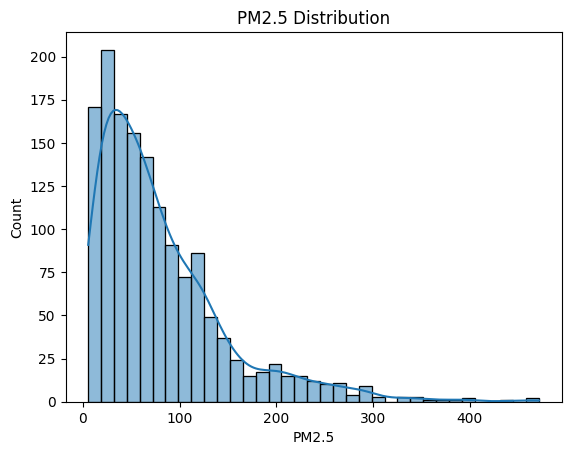

In [46]:
# Distribution of key variables
sns.histplot(df_daily['PM2.5'], kde=True)
plt.title('PM2.5 Distribution')
plt.show()

### 4.2 Time Series Plotting

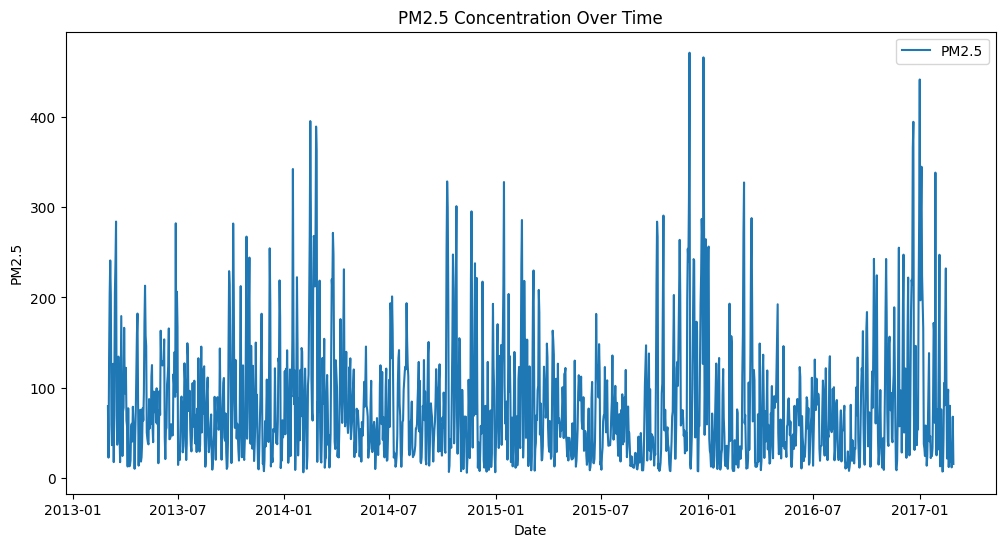

In [47]:
# Plotting PM2.5 over time
plt.figure(figsize=(12,6))
plt.plot(df_daily.index, df_daily['PM2.5'], label='PM2.5')
plt.title('PM2.5 Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

Based on the plot of PM2.5 over time, the data shows significant fluctuations with spikes, which could be caused by various factors. Smoothing could be beneficial in this case to reduce short-term noise and highlight underlying trends or patterns.

### 4.3 Correlation Analysis

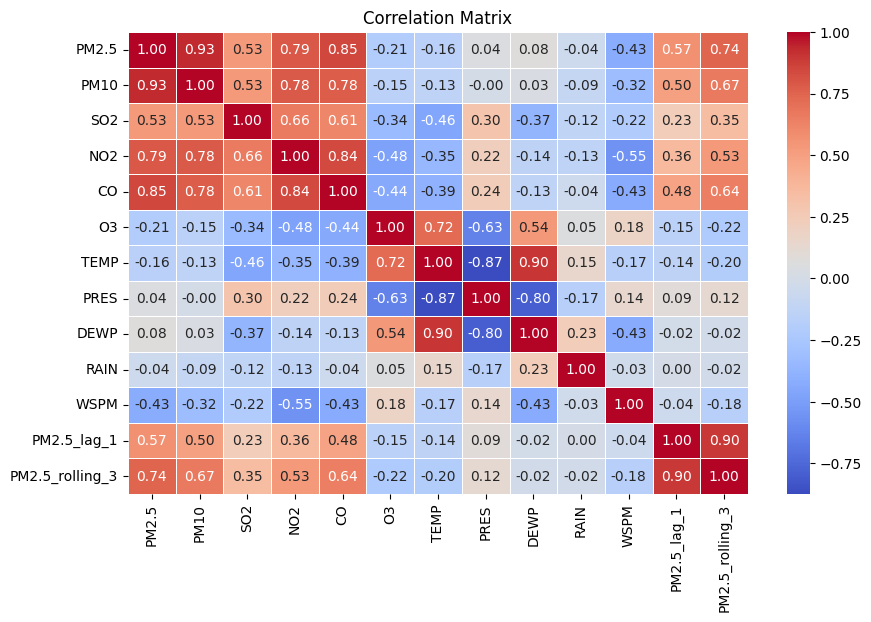

In [48]:
# Plot correlation matrix
correlation_matrix = df_daily.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### 4.4 Seasonality and Trends

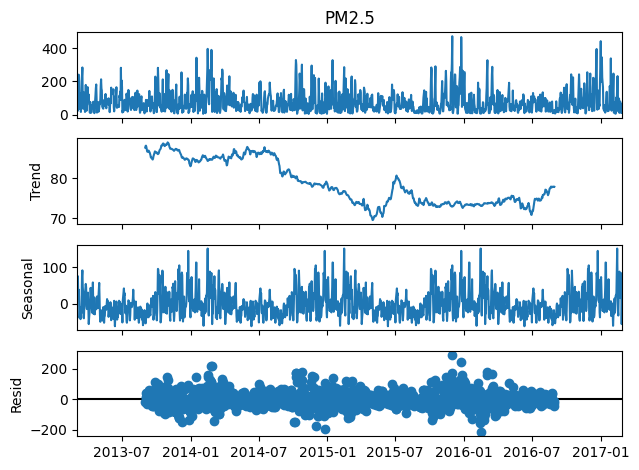

In [49]:
import statsmodels.api as sm

# Decompose PM2.5 time series into trend, seasonal, and residual components
pm25_ts = df_daily['PM2.5'].dropna()  # Drop missing values before analysis
decomposition = sm.tsa.seasonal_decompose(pm25_ts, model='additive', period=365)  # 365 days for yearly seasonality

# Plot the decomposition
decomposition.plot()
plt.show()

### 4.5  Outlier Detection

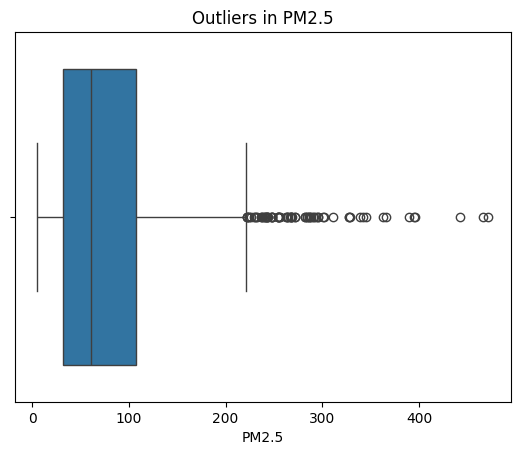

In [50]:
# Boxplot for detecting outliers in PM2.5
sns.boxplot(x=df_daily['PM2.5'])
plt.title('Outliers in PM2.5')
plt.show()

#### 4.5.1 Use IQR Method to Identify Outliers

In [51]:
# Calculate IQR for PM2.5
Q1 = df_daily['PM2.5'].quantile(0.25)
Q3 = df_daily['PM2.5'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_daily[(df_daily['PM2.5'] < lower_bound) | (df_daily['PM2.5'] > upper_bound)]

# Check the number of outliers
print(f'Number of outliers in PM2.5: {len(outliers)}')

Number of outliers in PM2.5: 72


#### 4.5.2 Handle Outliers

**Capping (Winsorization):** This method replaces the extreme values with a value at the lower or upper bound, reducing the impact of outliers while preserving the structure of the data.

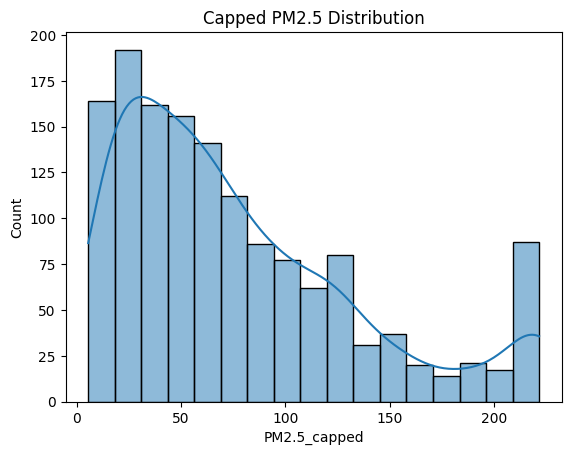

In [52]:
# Capping the PM2.5 values at the lower and upper bounds
df_daily['PM2.5_capped'] = df_daily['PM2.5'].clip(lower=lower_bound, upper=upper_bound)

# Visualize the capped distribution
sns.histplot(df_daily['PM2.5_capped'], kde=True)
plt.title('Capped PM2.5 Distribution')
plt.show()

### 4.6 Checking for Stationarity

#### 4.6.1 Visual Inspection:

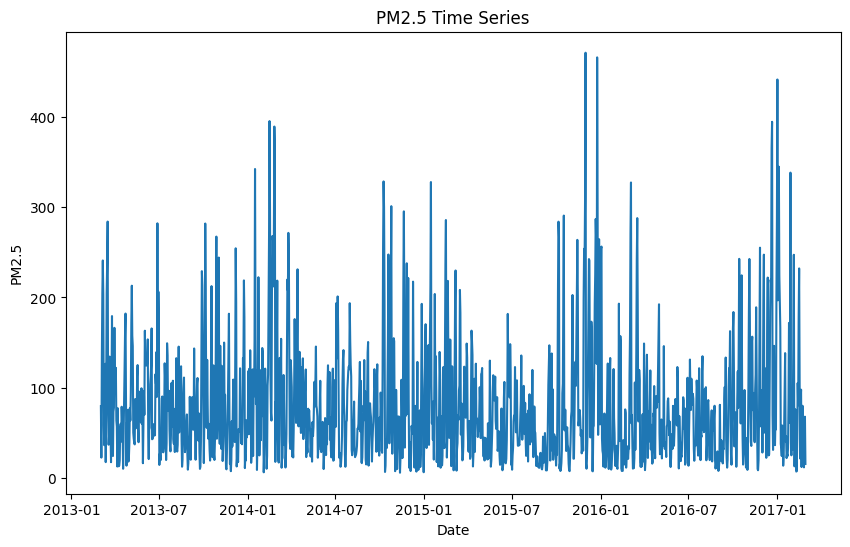

In [53]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(df_daily['PM2.5'])
plt.title('PM2.5 Time Series')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()

#### 4.6.2 Statistical Test - Augmented Dickey-Fuller (ADF) Test:

The ADF test is a formal test to check for stationarity. The null hypothesis (H₀) is that the series is non-stationary, and the alternative hypothesis (H₁) is that the series is stationary.

In [54]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
adf_result = adfuller(df_daily['PM2.5'].dropna())  # Drop NaN values if any

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

if adf_result[1] < 0.05:
    print("Reject null hypothesis: Data is stationary")
else:
    print("Fail to reject null hypothesis: Data is non-stationary")

ADF Statistic: -17.461085773079372
p-value: 4.596826898919001e-30
Reject null hypothesis: Data is stationary


The p-value is significantly below 0.05, indicating the **PM2.5** series is stationary. No further differencing is required for time-series modeling.


### 4.7 ACF and PACF Plot

Text(0.5, 1.0, 'ACF Plot')

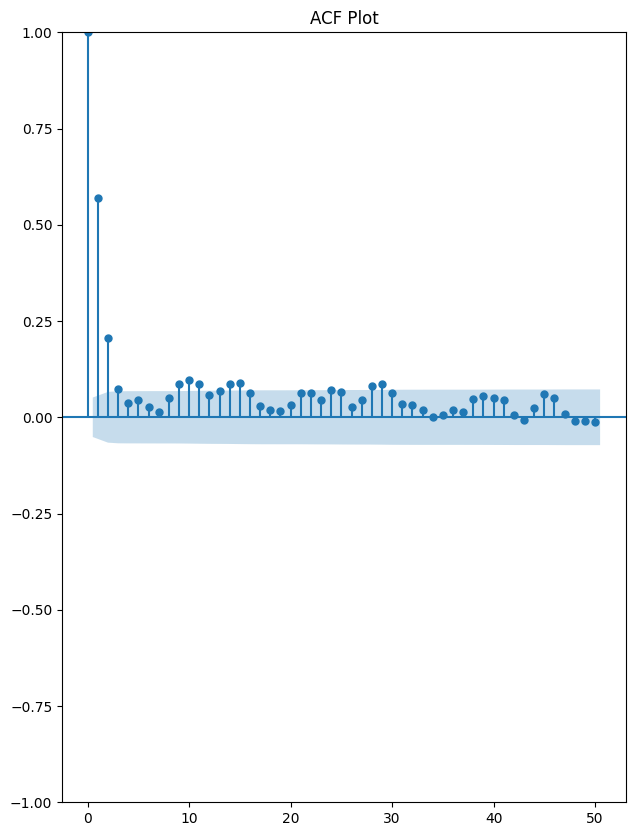

In [59]:
series = df_daily['PM2.5']

# Plot ACF and PACF to determine p and q
plt.figure(figsize=(16, 10))

# Plot ACF
plt.subplot(121)
plot_acf(series, lags=50, ax=plt.gca())
plt.title('ACF Plot')

### ACF Plot Interpretation

The ACF (Autocorrelation Function) plot reveals the following:

1. **First Spike at Lag 0**: This is expected because the series is perfectly correlated with itself at lag 0, resulting in a correlation of 1.

2. **Sharp Drop in Correlation After Lag 1**: After the first lag, the correlation drops sharply and becomes close to zero. This indicates that, beyond the first lag, the time series loses its autocorrelation and suggests that past values have a limited effect on future values.

3. **Remaining Positive and Negative Correlations**: Although the correlation diminishes, some positive and negative correlations persist at various lags. This suggests that there might still be some short-term dependencies in the data.

4. **Lack of Clear Seasonality or Periodicity**: There are no clear recurring spikes at regular intervals, indicating that the data does not exhibit strong seasonality or periodicity. The correlation drops significantly after lag 1, which suggests that the dependencies are likely short-term (e.g., daily trends).

### Conclusion:
The ACF plot suggests that the series has some short-term dependencies, but long-term memory is not apparent. This could indicate that differencing might be needed to remove residual trends or seasonality, followed by appropriate autoregressive (AR) and moving average (MA) components for an ARIMA model.

Text(0.5, 1.0, 'PACF Plot')

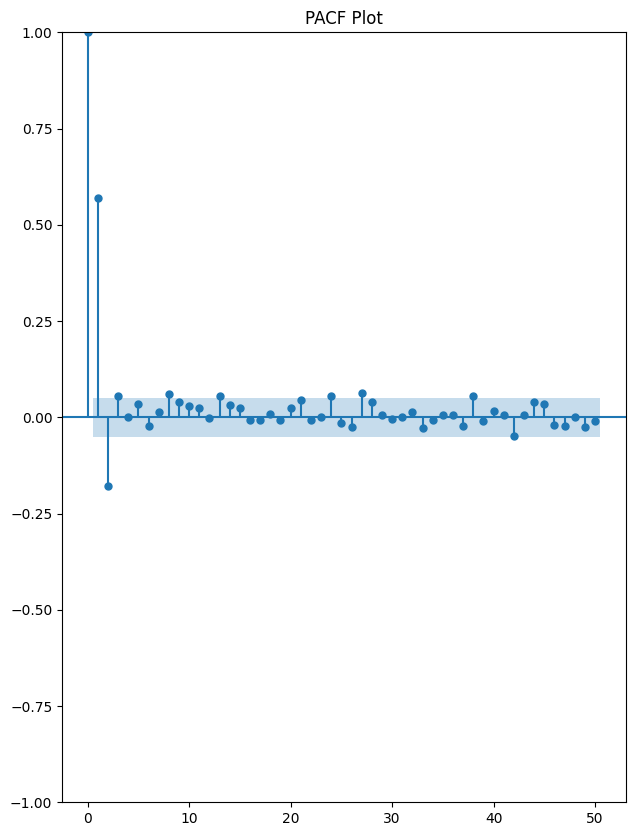

In [60]:
plt.figure(figsize=(16, 10))

# Plot PACF
plt.subplot(122)
plot_pacf(series, lags=50, ax=plt.gca())
plt.title('PACF Plot')

## 5. Model Selection and Training

### 5.1 Train-Test Split

In [61]:
# Split the data into training and test sets based on the year
train = df_daily[:'2016-12-31']  # Use data up to and including 2016 for training
test = df_daily['2017-01-01':]   # Use data from 2017 onward for testing

# Check the shapes of the split data
print(f'Training Data: {train.shape}')
print(f'Test Data: {test.shape}')

Training Data: (1400, 14)
Test Data: (59, 14)


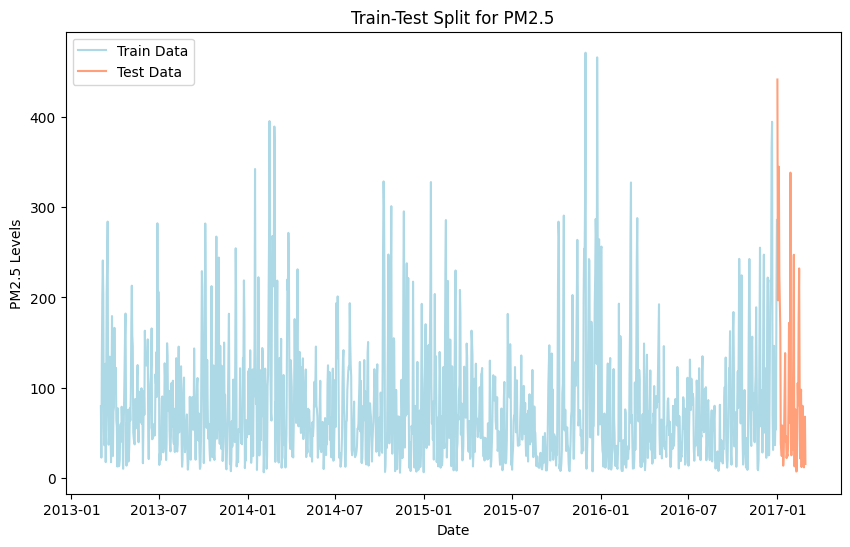

In [62]:
# Plot the train-test split for PM2.5 values with lighter shades
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['PM2.5'], label="Train Data", color='lightblue')
plt.plot(test.index, test['PM2.5'], label="Test Data", color='lightsalmon')
plt.title("Train-Test Split for PM2.5")
plt.xlabel("Date")
plt.ylabel("PM2.5 Levels")
plt.legend()
plt.show()

### 5.2 ARIMA Model


In [70]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p=1, d=1, q=1)
model_arima = ARIMA(train['PM2.5'], order=(1, 1, 1))
model_arima_fit = model_arima.fit()

# Make predictions on the test set
predictions_arima = model_arima_fit.forecast(steps=len(test))

# Use .loc to safely assign predictions to the test DataFrame
test.loc[:, 'ARIMA_Predictions'] = predictions_arima

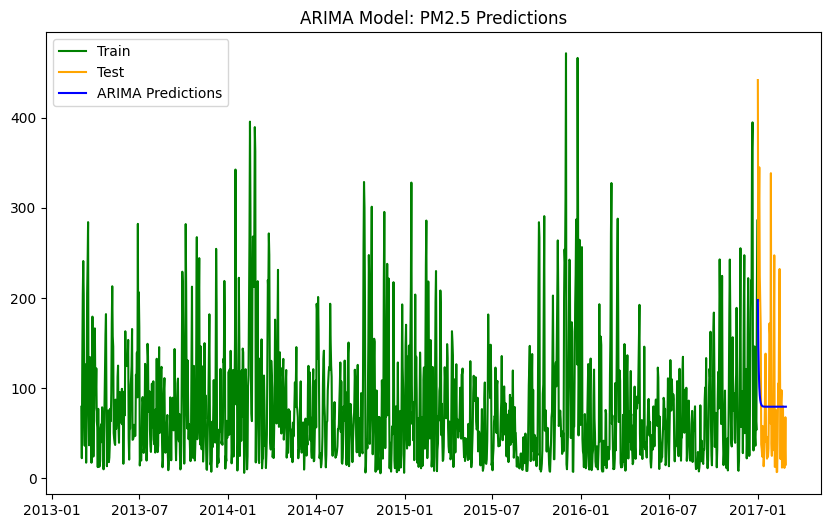

In [73]:
# Plot the predictions for ARIMA with distinguishable color
plt.figure(figsize=(10,6))
plt.plot(train['PM2.5'], label='Train', color='green')
plt.plot(test['PM2.5'], label='Test', color='orange')
plt.plot(test['ARIMA_Predictions'], label='ARIMA Predictions', color='blue')
plt.legend()
plt.title('ARIMA Model: PM2.5 Predictions')
plt.show()

### 5.3 SARMA Model

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (p=1, d=1, q=1)(P=1, D=1, Q=1, S=12)
model_sarima = SARIMAX(train['PM2.5'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_sarima_fit = model_sarima.fit()

# Make predictions on the test set
predictions_sarima = model_sarima_fit.forecast(steps=len(test))
test['SARIMA_Predictions'] = predictions_sarima

# Use .loc to safely assign predictions to the test DataFrame
test.loc[:, 'SARIMA_Predictions'] = predictions_sarima


<ipython-input-76-67c4b8d89840>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SARIMA_Predictions'] = predictions_sarima


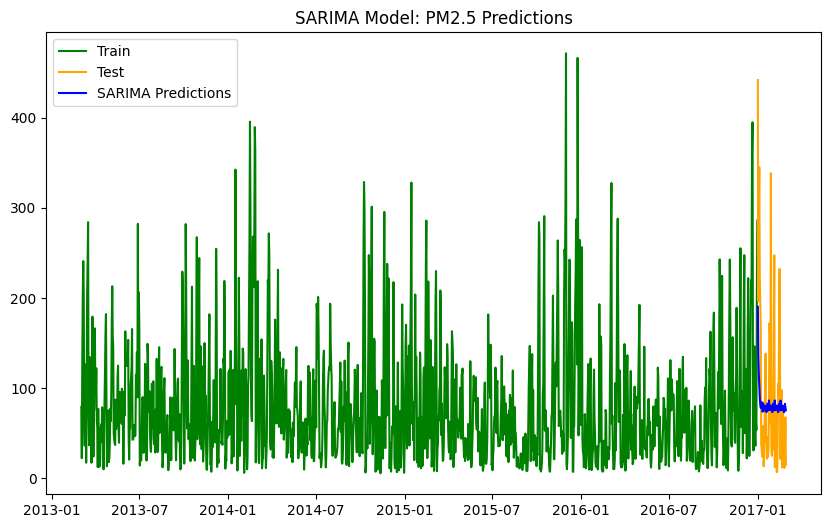

In [78]:
# Plot the predictions for SARIMA with distinguishable color
plt.figure(figsize=(10,6))
plt.plot(train['PM2.5'], label='Train', color='green')
plt.plot(test['PM2.5'], label='Test', color='orange')
plt.plot(test['SARIMA_Predictions'], label='SARIMA Predictions', color='blue')
plt.legend()
plt.title('SARIMA Model: PM2.5 Predictions')
plt.show()

### 5.4 Prophet Model

In [84]:
# Prepare data for Prophet
train_prophet = train.reset_index()[['datetime', 'PM2.5']].rename(columns={'datetime': 'ds', 'PM2.5': 'y'})
test_prophet = test.reset_index()[['datetime', 'PM2.5']].rename(columns={'datetime': 'ds', 'PM2.5': 'y'})

# Fit Prophet model
model_prophet = Prophet(daily_seasonality=True)
model_prophet.fit(train_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfgjrz0w9/268om4pg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfgjrz0w9/6kd06r0a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94499', 'data', 'file=/tmp/tmpfgjrz0w9/268om4pg.json', 'init=/tmp/tmpfgjrz0w9/6kd06r0a.json', 'output', 'file=/tmp/tmpfgjrz0w9/prophet_model2hem0l_3/prophet_model-20250115154110.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:41:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:41:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [97]:
# Specify the number of periods to forecast (e.g., 365 days)
num_periods = 365  # Set the number of periods you want to predict

# Create a dataframe for future predictions
future = model_prophet.make_future_dataframe(train_prophet, periods=num_periods, freq='D')

# Make predictions
forecast = model_prophet.predict(future)

# Plot the forecast
model_prophet.plot(forecast)
plt.title("Prophet Forecast for PM2.5")
plt.show()

TypeError: Prophet.make_future_dataframe() got multiple values for argument 'periods'

## Model Evaluation and Visualization

### Evaluate ARIMA Model:

In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics for ARIMA model
mae_arima = mean_absolute_error(test['PM2.5'], test['ARIMA_Predictions'])
mse_arima = mean_squared_error(test['PM2.5'], test['ARIMA_Predictions'])
rmse_arima = np.sqrt(mse_arima)

print(f"ARIMA Model Evaluation:")
print(f"MAE: {mae_arima:.4f}")
print(f"MSE: {mse_arima:.4f}")
print(f"RMSE: {rmse_arima:.4f}")

ARIMA Model Evaluation:
MAE: 63.5657
MSE: 7301.4815
RMSE: 85.4487


### Evaluate SARIMA Model:

In [93]:
# Calculate error metrics for SARIMA model
mae_sarima = mean_absolute_error(test['PM2.5'], test['SARIMA_Predictions'])
mse_sarima = mean_squared_error(test['PM2.5'], test['SARIMA_Predictions'])
rmse_sarima = np.sqrt(mse_sarima)

print(f"SARIMA Model Evaluation:")
print(f"MAE: {mae_sarima:.4f}")
print(f"MSE: {mse_sarima:.4f}")
print(f"RMSE: {rmse_sarima:.4f}")

SARIMA Model Evaluation:
MAE: 63.5621
MSE: 7402.8539
RMSE: 86.0398
